# 1 動機
### 我在這幾天看了一下Kaggle，所以想以Digit recongnizer 當學習KNN的第一步，
### 吳恩達的課中他有強調調參數的重要性，所以我想調看看KNN的參數來找到比較好的群。
### 老師也剛好有教到loss，所以我就以loss結合"群"，來找參數。

# 2 程式架構
### 讀入CSV檔，因為檔案太大所以有砍資料數，第一步先以K=20 來分類，發現準確率只有 0.75
## 想在看看調整K值有沒有不一樣的結果，那要怎麼辦呢? 不能一個個輸入吧
## 所以用了一個 array 來存下 3~29的準確率 再以圖表來分析看看
## 最後在驗證一次，印出準確度來確認


## [資料](https://www.kaggle.com/c/digit-recognizer/data)

In [59]:
import pandas as pd
from sklearn import neighbors
import numpy as np
from sklearn.model_selection import train_test_split


In [60]:
%matplotlib inline
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

In [61]:
Digit_recongnizer_training_data=pd.read_csv("train.csv")

In [62]:
 Digit_recongnizer_testing_data= pd.read_csv("test.csv")

In [63]:
Digit_recongnizer_testing_data.head()  #他沒有label

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## columns 
- label 是 predictions
- Imageld is datos

In [64]:
Digit_recongnizer_training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 檢查看看大小，太大了CPU跑不動，sklearn 不能支持GPU 所以跑很久，這裡卡了一點時間

In [65]:
Digit_recongnizer_training_data.shape

(42000, 785)

# # 提取特徵 我已pd中的 iloc來做提取
### 以下為範例iloc

In [66]:
mydata=np.random.randn(6,6)
df=pd.DataFrame(mydata,columns=list("ABCDEF"))
df

,A,B,C,D,E,F
0,1.147828,1.626467,-0.297187,1.012533,-0.659599,0.632604
1,-0.168101,0.440908,0.084167,-1.052720,-0.770661,-1.565280
2,-1.579895,3.104971,0.032392,-0.055099,-0.608378,-2.520745
3,0.508959,0.503136,0.792904,0.092067,0.370640,0.424142
4,-1.341607,-1.006136,-0.265941,0.094126,-0.232942,0.077068
5,0.542282,0.017927,-0.335102,1.277909,-0.406872,-0.724633


In [67]:
df.iloc[3:5,1:3]

,B,C
3,0.503136,0.792904
4,-1.006136,-0.265941


## 範例結束 --------------------------------------------------------------------------------------

In [68]:
Train_data_feature=Digit_recongnizer_training_data.iloc[:1000,1:]  #大小控制

In [69]:
Train_data_feature.shape   #吳恩達有說要特別注意大小

(1000, 784)

In [70]:
Train_data_feature.head() #除掉label 留下特徵

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
Train_data_label=Digit_recongnizer_training_data.iloc[:1000,0]  #留下label 除掉特徵

In [72]:
Train_data_label.shape

(1000,)

In [73]:
Train_data_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [95]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20) #以相鄰20點來做運算

### 因為test沒有label 所以就不用了。

In [96]:
x_train,x_test,y_train,y_test=train_test_split(Train_data_feature,Train_data_label,test_size=0.3,random_state=90) 

In [97]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

# 準確度

In [106]:
print(knn.score(x_test, y_test))

0.7566666666666667


## KNN 的分群算是很重要的參數
- 我想用一個array 存結果，找出最好的參數值
- 我用的是MSE 來算LOSS
- 我也有用交叉验证的方式(就是test 每一次去的地方都不同，此我設定CV=15)

In [113]:
n_neighbors_range=range(3,30) #我要找3~29群中 哪個最好
K_grade=[]
for i in n_neighbors_range:
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,Train_data_feature,Train_data_label, cv=15, scoring='accuracy')
    K_grade.append(scores.mean())

## 可以看出來 n_neighbors_range 在11~12 之間是比較好的準確性

Text(0,0.5,'scores')

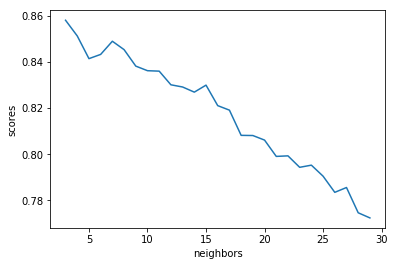

In [114]:
plt.plot(n_neighbors_range,K_grade)
plt.xlabel("neighbors")
plt.ylabel("scores")

# 上圖可以知道 neighbors在四左右準確率會比較高

In [93]:
knn_good =neighbors.KNeighborsClassifier(n_neighbors=4) 


knn_good.fit(x_train,y_train)
print(knn_good.score(x_test, y_test))

0.87
